# Introducing marathon results data analysis


There is a lot of information on runners and their performance for many popular marathon races around the world. By analzying the results from the marathon race data, you can get insights to where these runners come from and theirs characteristics. Furthermore, you can do a deep diver into marathon finishing time data in order to extract statistics about average splits time, finishing average pace or even know if you can get into top 10 elite finishers. In this notebook, we are going to explore the historical data from a popular marathon and look at factors such as gender, age, place of origin and other data marathon insights.


## Introduction

2022 is a special year for the Baxters Loch Ness Marathon. It is the 20th edition and it will mark it with a special commemorative finishers t-shirt. The race is quite popular race in UK and it's featured as one of the top 10 bucket list marathons by Runners World readers in 2016. The route takes competitors from the start line in a more remote part of South Loch Ness with incredible views through some of the spectacular scenery in the Highlands, Scotland, along side Loch Ness and finishes in the beautifiul Highland capital of Inverness.

As it happens the data of the Loch Ness Marathon finisher results from the period 2003-2022 are available online, providing access to a lots of data from numbers of participants, gender, age ranges, finish-time, and even the split-time for some editions.  There are more than 30,000 finisher records in what follows we will provide a brief summary of what we can discover from the marathon analysis. 

![Lochness Marathon - 2022](lochness_marathon.png "2022 Loch Ness Marathon")

## Presenting runpandas race results feature

Runpandas is a python package for accessing and analyzing GPS-oriented workouts from running track records. Since the release 0.7.0 the Runpandas added a new feature of accessing and analyzing world-wide marathon race results. This is possible since a great effort from our community to gather from several sources the race results and organize and indexed them so the data analysts can now perform post-race analysis using Pandas DataFrames ans Series. In this example, we will cover this add-on by extracting some statistics from a UK 2003-2022 UK marathon.

### Let's fetch the data

Runpandas package comes with a special method ``runpandas.get_events`` . This function provides a way of accessing the race data and visualize the results from several marathons available at our datasets repository. Given the year and the marathon identifier you can filter any marathon datasets that you want analyze. The result will be a list of ``runpandas.EventData`` instances with race result and its metadata. Let's look for the Loch Ness Marathon results.

In [3]:
import pandas as pd
import runpandas as rpd
import warnings
warnings.filterwarnings('ignore')

/opt/miniconda3/envs/runpandas_dev/lib/python3.8/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [541]:
results = rpd.get_events('Lochness')


[<Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2022>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2021>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2019>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2018>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2017>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2016>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2015>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2014>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2013>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2012>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2011>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2010>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2009>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2008>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2007>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2006>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2005>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2004>, <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2003>]

Let's take a look inside of one of results. The 2022 race result for instance. The race event comes with a handful method to describe its attributes and a special method to load the race result data into a `runpandas.datasets.schema.RaceData` instance.

In [540]:
single_2022 = results[0]
print('Event type', single_2022.run_type)
print('Country', single_2022.country)
print('Year', single_2022.edition)
print('Name', single_2022.summary)

Event type RunTypeEnum.MARATHON
Country UK
Year 2022
Name UK Lochness Marathon Results from 2022 to 2003.



In [6]:
#loading the race data into a RaceData Dataframe
race_result = single_2022.load()
race_result

,position,bib,firstname,lastname,half,grosstime,nettime,category
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS
...,...,...,...,...,...,...,...,...
2553,2554,3304,Molka,NaN,0 days 03:26:28,0 days 07:48:00,0 days 07:42:42,FS
2554,2555,1363,Alex,Cavanagh,0 days 03:50:38,0 days 08:06:33,0 days 08:00:22,M50+
2555,2556,2425,Artemis,Gkisdaki,0 days 03:50:43,0 days 08:06:33,0 days 08:00:23,F40+
2556,2557,1662,Sharon,Hill,0 days 03:00:30,0 days 08:28:48,0 days 08:25:06,F50+


Now you can get further information about the Lochness Marathon 2022, by using its tailored methods for getting basic and quick insights. For example, the number of finishers, number of participants and the winner info.

In [7]:
print('Total participants', race_result.total_participants)
print('Total finishers', race_result.total_finishers)
print('Total Non-Finishers', race_result.total_nonfinishers)

Total participants 2558
Total finishers 2558
Total Non-Finishers 0


In [8]:
race_result.winner

position                   1
bib                     4276
firstname             Dougie
lastname              Selman
half         0 days 01:11:28
grosstime    0 days 02:23:53
nettime      0 days 02:23:52
category                  MS
Name: 0, dtype: object

As you can see above, the winner of the 2022 Loch Ness Marathon finished with the time of 02:23:52.  How about the race's summary?

In [9]:
race_result.summary()

Event name                    Lochness marathon
Event type                                  42k
Event country                                UK
Event date                           02-10-2022
Number of participants                     2558
Number of finishers                        2558
Number of non-finishers                       0
Number of male finishers                       
Number of female finishers                     
Winner Nettime                  0 days 02:23:52
dtype: object

## Analyzing all the marathon's historical data


Now that we introduced the runpandas race results package, let's play with the data and try to see if we have some interesting findings. Let's compile all editions into a single dataframe.


In [10]:
#Loop over all the editions, load it, remove the non-finishers and infer the year and concat them into a single dataframe.
all_editions = []
for result in results:
    edition = result.edition
    single_result = result.load()
    only_finishers = single_result[single_result["position"].ne("DNF")]
    only_finishers['Year'] = edition
    all_editions.append(only_finishers)

lochness_data = pd.concat(all_editions)
lochness_data

,position,bib,firstname,lastname,half,grosstime,nettime,category,Year
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS,2022
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+,2022
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS,2022
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS,2022
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS,2022
...,...,...,...,...,...,...,...,...,...
747,748,1063,Catherine,Macneil,NaT,NaT,0 days 06:09:40,F35+,2003
748,749,323,Iain,Stirling,NaT,NaT,0 days 06:16:40,MOPEN,2003
749,750,324,Megan,Coombs,NaT,NaT,0 days 06:16:40,FOPEN,2003
750,751,1115,Annie,Griffiths,NaT,NaT,0 days 07:28:00,F45+,2003


### Who runs the Loch Ness Marathon ?

What people put themselves through 42km,195m of hurt and a cycle of months of training before the marathon? Is the marathon just for the commited few endurance athtletes? The life-long athletes? The over-achievers ? Let's look at the data and see the demographics of the participants.

In [11]:
#We don't have the age and the gender, so we need to infer it from the category data which contains the sex and the age category (Seniors or masters)

race_result.info()

<class 'runpandas.types.frame.RaceResult'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   position   2558 non-null   object         
 1   bib        2558 non-null   object         
 2   firstname  2542 non-null   object         
 3   lastname   2544 non-null   object         
 4   half       2550 non-null   timedelta64[ns]
 5   grosstime  2558 non-null   timedelta64[ns]
 6   nettime    2558 non-null   timedelta64[ns]
 7   category   2558 non-null   object         
dtypes: object(5), timedelta64[ns](3)
memory usage: 160.0+ KB


In [12]:
def get_gender(row):
    if 'F' in row:
        return 'F'
    elif 'M' in row:
        return 'M'
    else:
        return 'UNK'

lochness_data['gender']=lochness_data['category'].apply(get_gender) #infer sex
lochness_data


,position,bib,firstname,lastname,half,grosstime,nettime,category,Year,gender
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS,2022,M
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+,2022,M
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS,2022,M
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS,2022,M
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS,2022,M
...,...,...,...,...,...,...,...,...,...,...
747,748,1063,Catherine,Macneil,NaT,NaT,0 days 06:09:40,F35+,2003,F
748,749,323,Iain,Stirling,NaT,NaT,0 days 06:16:40,MOPEN,2003,M
749,750,324,Megan,Coombs,NaT,NaT,0 days 06:16:40,FOPEN,2003,F
750,751,1115,Annie,Griffiths,NaT,NaT,0 days 07:28:00,F45+,2003,F


In [13]:
def get_age_category(row):
    if '50' in row:
        return 'Master'
    elif '55' in row:
        return 'Master'
    elif '45' in row:
        return 'Master'
    elif '70' in row:
        return 'Master'
    elif '60' in row:
        return 'Master'
    elif 'MS' in row:
        return 'Senior'
    elif 'FS' in row:
        return 'Senior'
    elif 'OPEN' in row:
        return 'Senior'
    elif '35' in row:
        return 'Master'
    elif row in 'MU40':
        return 'Senior'
    elif '40' in row:
        return 'Master'
    elif row in 'Male':
        return 'Senior'
    elif row in 'Female':
        return 'Senior'
    elif row in 'MALE':
        return 'Senior'
    elif row in 'FEMALE':
        return 'Senior'
    elif 'Unknown' in row:
        return 'Unk'
    elif row in 'TBC':
        return 'Senior'
    else:
        return row

lochness_data['age_category']=lochness_data['category'].apply(get_age_category) #infer age category

Now we have two new column infered from the category data: gender (Male, Female or Unknown) and age_category (for male, the under 40' seniors and over 40' masters. For women, the masters applies over 35 years old and seniors under 35'.)

In [14]:
lochness_data

,position,bib,firstname,lastname,half,grosstime,nettime,category,Year,gender,age_category
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS,2022,M,Senior
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+,2022,M,Master
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS,2022,M,Senior
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS,2022,M,Senior
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS,2022,M,Senior
...,...,...,...,...,...,...,...,...,...,...,...
747,748,1063,Catherine,Macneil,NaT,NaT,0 days 06:09:40,F35+,2003,F,Master
748,749,323,Iain,Stirling,NaT,NaT,0 days 06:16:40,MOPEN,2003,M,Senior
749,750,324,Megan,Coombs,NaT,NaT,0 days 06:16:40,FOPEN,2003,F,Senior
750,751,1115,Annie,Griffiths,NaT,NaT,0 days 07:28:00,F45+,2003,F,Master


In [15]:
#Now let's conver the finish time into minutes for better visualization

def convert_to_minutes(row):
    return int(row['nettime'].total_seconds() / 60)

lochness_data['nettime_minutes'] = lochness_data.apply(convert_to_minutes, axis=1) # add a minutes field
lochness_data

,position,bib,firstname,lastname,half,grosstime,nettime,category,Year,gender,age_category,nettime_minutes
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS,2022,M,Senior,143
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+,2022,M,Master,146
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS,2022,M,Senior,146
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS,2022,M,Senior,148
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS,2022,M,Senior,153
...,...,...,...,...,...,...,...,...,...,...,...,...
747,748,1063,Catherine,Macneil,NaT,NaT,0 days 06:09:40,F35+,2003,F,Master,369
748,749,323,Iain,Stirling,NaT,NaT,0 days 06:16:40,MOPEN,2003,M,Senior,376
749,750,324,Megan,Coombs,NaT,NaT,0 days 06:16:40,FOPEN,2003,F,Senior,376
750,751,1115,Annie,Griffiths,NaT,NaT,0 days 07:28:00,F45+,2003,F,Master,448


Let's group the data by year to count the number of finishers, by year and gender to have a glue about the gender distribution among the participants and by age_category (masters, seniors) and year.

In [23]:
agg_year = lochness_data.groupby(["Year"]).agg({'position': ["count"]}).reset_index()
agg_gender_year = lochness_data.groupby(["Year", 'gender']).agg({'position': ["count"]}).unstack(fill_value=0).stack()
agg_gender_year = agg_gender_year.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
agg_category_year = lochness_data.groupby(["Year", 'age_category']).agg({'position': ["count"]}).unstack(fill_value=0).stack()
agg_category_year = agg_category_year.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

print('% Average female over years', agg_gender_year[agg_gender_year['gender'] == 'F']['position']['count'].mean())
print('% Average masters over the years', agg_category_year[agg_category_year['age_category'] == 'Master']['position']['count'].mean())

% Average female over years 33.57880850628818
% Average masters over the years 52.0813968154838


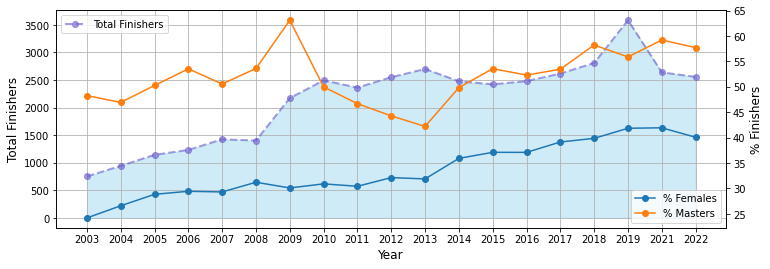

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,4))
ax2 = ax1.twinx()
ax1.fill_between(agg_year.Year, 
agg_year['position']['count'],
                 color="skyblue", alpha=0.4)
ax1.plot(agg_year.Year, agg_year['position']['count'], color="Slateblue",
         alpha=0.6, linewidth=2,  linestyle='dashed', marker='o', label='Total Finishers')
ax2.plot(agg_year.Year, agg_gender_year[agg_gender_year['gender'] == 'F']['position']['count'],marker='o', label='% Females' )
ax2.plot(agg_year.Year, agg_category_year[agg_category_year['age_category'] == 'Master']['position']['count'],marker='o', label='% Masters' )
ax1.set_xlabel('Year', size=12)
ax1.set_ylabel('Total Finishers', size=12)
ax2.set_ylabel('% Finishers', size=12)
ax1.grid()
ax1.legend(loc=0)
ax2.legend(loc=4)
plt.show()

The Lochness Marathon has experienced a sustained period of growth over the years , until 2019, when we had the pandemic outbreak. These two years 2021 and 2022 comes to our attention due to the participants reduction. When we tried to see the main reason that it could explain it, we found that the famous major London Marathon happened at the same weekend as Lochness. This concorrence might explain that more people prefer to run the London one instead the Loch Ness. Next year, the London will return to the same date as the previous date before the outbreak (April), allowing people to run in second semester our dear Loch ness marathon. As shown above, the 700 or so finishers in the year 20023 almost tripled by 2200 by 2022.

The number of parcipants have been growing, but most of finishers (more than 60%) are still men. Overall the percentage of finishers who are female is about 33% but since 2013 the percentage of female finishers is mostly rising (almost 40%).

When we look at the age of the participants we see a evenly distribution of the seniors x masters. Overall, 



It’s a different story when it comes to the age of participants. Overall, 52% of participants are under 40 years old (for the purpose of this notebook these are referred to as seniors), leaving 48% over 40 (we will refer to these as masters runners). But the proportion of older runners has been growing steadily since 2013. Insteresting to see a peak of more than 60% of masters in 2009, and in 2013, just less half of participantes were over 40.



Now, let's take a look at the pacers, let's find out the distribution of finishers considered the fasters, joggers and the walkers. For this analysis, we group by the data based on the finish times of the participants and classify them as faster runners (finishers within 4 hours), joggers (those finishing between 4 and 6 hours) and walkers (6+ hours).

Pandas has powerful methods to help us in performing this task with a few lines of code like the method ``pandas.cut``.


In [45]:
import numpy as np
groups = ['fasters', 'joggers', 'walkers']
evaluation = [0,240, 360, np.inf]
lochness_data['pacer'] = pd.cut(lochness_data['nettime_minutes'], bins=evaluation, 
                                labels=groups, include_lowest=True, right=False)
lochness_data

,position,bib,firstname,lastname,half,grosstime,nettime,category,Year,gender,age_category,nettime_minutes,pacer
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS,2022,M,Senior,143,fasters
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+,2022,M,Master,146,fasters
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS,2022,M,Senior,146,fasters
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS,2022,M,Senior,148,fasters
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS,2022,M,Senior,153,fasters
...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,748,1063,Catherine,Macneil,NaT,NaT,0 days 06:09:40,F35+,2003,F,Master,369,walkers
748,749,323,Iain,Stirling,NaT,NaT,0 days 06:16:40,MOPEN,2003,M,Senior,376,walkers
749,750,324,Megan,Coombs,NaT,NaT,0 days 06:16:40,FOPEN,2003,F,Senior,376,walkers
750,751,1115,Annie,Griffiths,NaT,NaT,0 days 07:28:00,F45+,2003,F,Master,448,walkers


Now that we have segmented our runners by finish time, let's compute the distribution over the years.

In [50]:
agg_pace_year = lochness_data.groupby(["Year", 'pacer']).agg({'position': ["count"]}).unstack(fill_value=0).stack()
agg_pace_year = agg_pace_year.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

agg_pace_year

,Year,pacer,position
,,,count
0,2003,fasters,48.670213
1,2003,joggers,50.265957
2,2003,walkers,1.063830
3,2004,fasters,45.656780
4,2004,joggers,52.012712
5,2004,walkers,2.330508
6,2005,fasters,47.027972
7,2005,joggers,50.524476
8,2005,walkers,2.447552


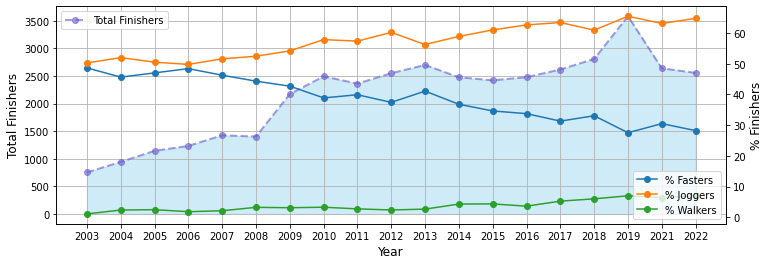

In [51]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax2 = ax1.twinx()
ax1.fill_between(agg_year.Year, 
agg_year['position']['count'],
                 color="skyblue", alpha=0.4)
ax1.plot(agg_year.Year, agg_year['position']['count'], color="Slateblue",
         alpha=0.6, linewidth=2,  linestyle='dashed', marker='o', label='Total Finishers')
ax2.plot(agg_year.Year, agg_pace_year[agg_pace_year['pacer'] == 'fasters']['position']['count'],marker='o', label='% Fasters' )
ax2.plot(agg_year.Year, agg_pace_year[agg_pace_year['pacer'] == 'joggers']['position']['count'],marker='o', label='% Joggers' )
ax2.plot(agg_year.Year, agg_pace_year[agg_pace_year['pacer'] == 'walkers']['position']['count'],marker='o', label='% Walkers' )

ax1.set_xlabel('Year', size=12)
ax1.set_ylabel('Total Finishers', size=12)
ax2.set_ylabel('% Finishers', size=12)
ax1.grid()
ax1.legend(loc=0)
ax2.legend(loc=4)
plt.show()

Loch ness is considered by many running expert reviews as a challenging race due to his course profile. It's predominantly uphill and undulates a lot. This is shown by the numbers here based on percentage of the finishing segments. The percentage of faster runners (those finishing within 4 hours) has been falling, from 48% of participants in 2003 to around 28% by 2022. Meanwhile the percentage of joggers (finishers between 4 and 6 hours) has been steadily increasing to 65%. Finally the percentage of walkers (6+ hours) has remained more or less constant at 2-3%, but since 2016 started to grow, to have 6% in 2022. Loch ness is an exciting race, but it is not easy for the first time marathoners not used to train in uphill conditions.


### Analyzing the finishing times

Let's understand now the average finish-time over the years, let's find out if the race is becoming faster or slower. Based on the chart above, I can bet that the race is turning slower! Let's analyze it.

Below is a graph of the average finish-times for each year, measured across all participants. It also shows separate averages for men and women as well as for seniors (the under 40's) and master (over 40's) participants.


In [89]:
#Average finish-times per year for gender and age category.
agg_pace_year = lochness_data.groupby(["Year"]).agg({'nettime_minutes': ["mean"]}).reset_index()
agg_pace_gender_year = lochness_data.groupby(["Year", 'gender']).agg({'nettime_minutes': ["mean"]}).unstack(fill_value=0).stack().reset_index()
agg_pace_category_year = lochness_data.groupby(["Year", 'age_category']).agg({'nettime_minutes': ["mean"]}).unstack(fill_value=0).stack().reset_index()

agg_pace_year

,Year,nettime_minutes
,,mean
0,2003,247.926862
1,2004,252.345339
2,2005,250.026224
3,2006,248.103001
4,2007,248.324684
5,2008,253.705631
6,2009,254.153705
7,2010,258.353106
8,2011,257.301735


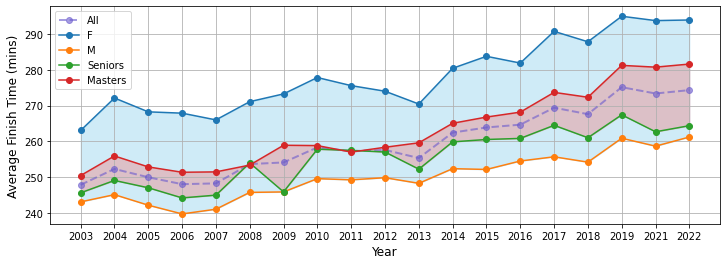

In [88]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.fill_between(agg_year.Year,
    agg_pace_gender_year[agg_pace_gender_year['gender'] == 'F']['nettime_minutes']['mean'],
    agg_pace_gender_year[agg_pace_gender_year['gender'] == 'M']['nettime_minutes']['mean'],
                 color="skyblue", alpha=0.4)
ax1.fill_between(agg_year.Year,
    agg_pace_category_year[agg_pace_category_year['age_category'] == 'Senior']['nettime_minutes']['mean'],
    agg_pace_category_year[agg_pace_category_year['age_category'] == 'Master']['nettime_minutes']['mean'],
                 color="lightcoral", alpha=0.4)

ax1.plot(agg_pace_year.Year, agg_pace_year['nettime_minutes']['mean'], color="Slateblue",
         alpha=0.6, linewidth=2,  linestyle='dashed', marker='o', label='All')
ax1.plot(agg_pace_year.Year, agg_pace_gender_year[agg_pace_gender_year['gender'] == 'F']['nettime_minutes']['mean'],marker='o', label='F' )
ax1.plot(agg_pace_year.Year, agg_pace_gender_year[agg_pace_gender_year['gender'] == 'M']['nettime_minutes']['mean'],marker='o', label='M' )
ax1.plot(agg_pace_year.Year, agg_pace_category_year[agg_pace_category_year['age_category'] == 'Senior']['nettime_minutes']['mean'],marker='o', label='Seniors' )
ax1.plot(agg_pace_year.Year, agg_pace_category_year[agg_pace_category_year['age_category'] == 'Master']['nettime_minutes']['mean'],marker='o', label='Masters' )
ax1.set_xlabel('Year', size=12)
ax1.set_ylabel('Average Finish Time (mins)', size=12)
ax1.grid()
ax1.legend(loc=0)
plt.show()

In [129]:
agg_filtered_gender_year = agg_pace_gender_year[agg_pace_gender_year.gender !='UNK']
pivoted_table = agg_filtered_gender_year.pivot_table('nettime_minutes', ['Year'], 'gender')
pivoted_table.groupby('Year').apply(lambda row: (row['mean']['F'] - row['mean']['M']))

Year  Year
2003  2003    19.893298
2004  2004    26.930834
2005  2005    26.007888
2006  2006    28.071731
2007  2007    24.885354
2008  2008    25.280136
2009  2009    27.310101
2010  2010    28.174260
2011  2011    26.246198
2012  2012    24.100786
2013  2013    22.094928
2014  2014    27.966035
2015  2015    31.525888
2016  2016    27.286093
2017  2017    34.947531
2018  2018    33.538366
2019  2019    33.986777
2021  2021    34.984848
2022  2022    32.604814
dtype: float64

In [130]:
pivoted_table_cy = agg_pace_category_year.pivot_table('nettime_minutes', ['Year'], 'age_category')
pivoted_table_cy.groupby('Year').apply(lambda row: (row['mean']['Master'] - row['mean']['Senior']))


Year  Year
2003  2003     4.813730
2004  2004     6.826681
2005  2005     5.814570
2006  2006     7.146756
2007  2007     6.483011
2008  2008    -0.603654
2009  2009    12.992583
2010  2010     1.011105
2011  2011    -0.475759
2012  2012     1.328199
2013  2013     7.344347
2014  2014     5.178254
2015  2015     6.247099
2016  2016     7.319418
2017  2017     9.180912
2018  2018    11.278335
2019  2019    13.778517
2021  2021    18.007645
2022  2022    17.172308
dtype: float64

As we can see from these results, it suggests a very significant increasing in finish-times for all categories (men and women, young and old). In 2003 the average finish-time was 247 minutes and went just over 274 minutes by 2022, a 30-minute slowness. Yeah, it is not a easy race!

It is also interesting to note how gender has a much greater influence on finish-times than age. For instance, the difference between finish-times of men and women varies from 19 minutes in 2003 to 34 minutes in 2021. Otherwise, the difference in finish-times between seniors and masters varies from 4 to 18 minutes. Interesting to see that at some years (2008 and 2011) seniors and masters average finish-times are almost the same!

The average finish-time retrogression of 32-34 minutes doesn't tell us much, besides it is not a flat route. For this checkpoint, we started to investigate the distribution of the finish-times among the participants (female or men) for the four year periods from 2003-2007 and 2017-2022, or goal to see a drop in the number of faster runners, since the last four years due to the covid-19 outbreak, many major races was postponed to 2021-2022, attracting this category of runners.

In [141]:
#Filtering the data by the corresponding years and removing unknown gender references
lochness_2003_2007 = lochness_data[(lochness_data['gender'] != 'UNK') & (lochness_data['Year'].isin(['2003', '2004', '2005', '2006', '2007']))]
lochness_2017_2022 = lochness_data[(lochness_data['gender'] != 'UNK') & (lochness_data['Year'].isin(['2017', '2018', '2019', '2021', '2022']))]

In [186]:
#aggregating by gender male and compute the finish time distribution
lochness_2003_2007_males = lochness_2003_2007[lochness_2003_2007['gender'] == 'M']
lochness_2003_2007_males_count = lochness_2003_2007_males.groupby('nettime_minutes').agg(total=('nettime_minutes', 'count')).reset_index()
lochness_2003_2007_males_count['proportion'] = lochness_2003_2007_males_count['total'] / lochness_2003_2007_males_count['total'].sum()

lochness_2003_2007_females = lochness_2003_2007[lochness_2003_2007['gender'] == 'F']
lochness_2003_2007_females_count = lochness_2003_2007_females.groupby('nettime_minutes').agg(total=('nettime_minutes', 'count')).reset_index()
lochness_2003_2007_females_count['proportion'] = lochness_2003_2007_females_count['total'] / lochness_2003_2007_females_count['total'].sum()

lochness_2017_2022_males = lochness_2017_2022[lochness_2017_2022['gender'] == 'M']
lochness_2017_2022_males_count = lochness_2017_2022_males.groupby('nettime_minutes').agg(total=('nettime_minutes', 'count')).reset_index()
lochness_2017_2022_males_count['proportion'] = lochness_2017_2022_males_count['total'] / lochness_2017_2022_males_count['total'].sum()

lochness_2017_2022_females = lochness_2017_2022[lochness_2017_2022['gender'] == 'F']
lochness_2017_2022_females_count = lochness_2017_2022_females.groupby('nettime_minutes').agg(total=('nettime_minutes', 'count')).reset_index()
lochness_2017_2022_females_count['proportion'] = lochness_2017_2022_females_count['total'] / lochness_2017_2022_females_count['total'].sum()





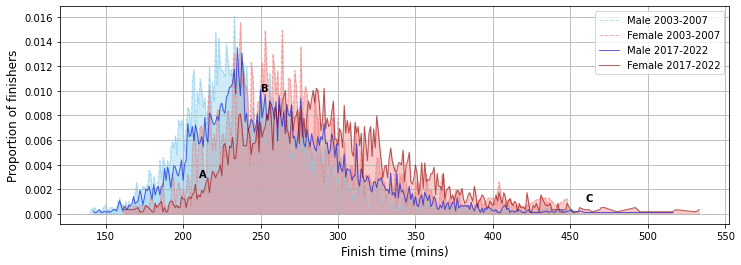

In [228]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.fill_between(lochness_2003_2007_males_count.nettime_minutes,
   lochness_2003_2007_males_count['proportion'],
                 color="skyblue", alpha=0.4)
ax1.fill_between(lochness_2003_2007_females_count.nettime_minutes,
   lochness_2003_2007_females_count['proportion'],
                 color="lightcoral", alpha=0.4)
ax1.fill_between(lochness_2017_2022_males_count.nettime_minutes,
   lochness_2017_2022_males_count['proportion'],
                 color="skyblue", alpha=0.4)
ax1.fill_between(lochness_2017_2022_females_count.nettime_minutes,
   lochness_2017_2022_females_count['proportion'],
                 color="lightcoral", alpha=0.4)
ax1.plot(lochness_2003_2007_males_count.nettime_minutes, lochness_2003_2007_males_count['proportion'], color="skyblue",
         alpha=0.6, linewidth=1, linestyle='dashed', label='Male 2003-2007')
ax1.plot(lochness_2003_2007_females_count.nettime_minutes, lochness_2003_2007_females_count['proportion'], color="lightcoral",
         alpha=0.6, linewidth=1, linestyle='dashed', label='Female 2003-2007')
ax1.plot(lochness_2017_2022_males_count.nettime_minutes, lochness_2017_2022_males_count['proportion'], color="mediumblue",
         alpha=0.6, linewidth=1, label='Male 2017-2022')
ax1.plot(lochness_2017_2022_females_count.nettime_minutes, lochness_2017_2022_females_count['proportion'], color="darkred",
         alpha=0.6, linewidth=1, label='Female 2017-2022')

plt.text(210,0.003,'A', fontweight='bold')
plt.text(250,0.01,'B', fontweight='bold')
plt.text(460,0.001,'C', fontweight='bold')
ax1.set_xlabel('Finish time (mins)', size=12)
ax1.set_ylabel('Proportion of finishers', size=12)
ax1.grid()
ax1.legend(loc=0)
plt.show()

Above, we see the proportion of finishers based on their finish times. We notice a lots of spikes, since the data is very scattered. To a better visualization and interpretation we wil reduce the noise from such data using the smoothing process. There are many techniques to reduce noise, in our scenario here we will apply the Gaussian kernel smoothing to carry out the smoothing.

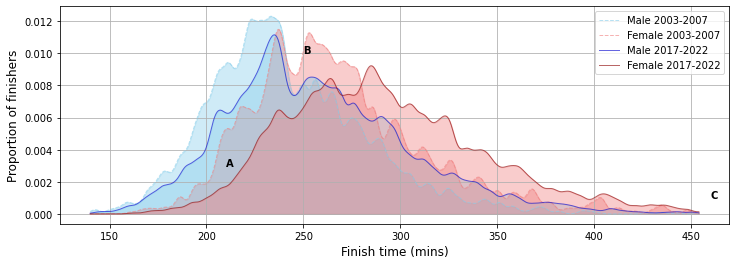

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
X_=np.linspace(lochness_2003_2007_males_count.nettime_minutes.min(), lochness_2003_2007_males_count.nettime_minutes.max(), 500)

kde_2003_2007_males_count = gaussian_kde(lochness_2003_2007_males_count.nettime_minutes, weights = lochness_2003_2007_males_count['proportion'], bw_method = .05)  #tune `bw_method` to get the bandwidth you want
kde_2003_2007_females_count = gaussian_kde(lochness_2003_2007_females_count.nettime_minutes, weights = lochness_2003_2007_females_count['proportion'], bw_method = .05)  #tune `bw_method` to get the bandwidth you want
kde_2017_2022_males_count = gaussian_kde(lochness_2017_2022_males_count.nettime_minutes, weights = lochness_2017_2022_males_count['proportion'], bw_method = .05)  #tune `bw_method` to get the bandwidth you want
kde_2017_2022_females_count = gaussian_kde(lochness_2017_2022_females_count.nettime_minutes, weights = lochness_2017_2022_females_count['proportion'], bw_method = .05)  #tune `bw_method` to get the bandwidth you want


fig, ax1 = plt.subplots(figsize=(12,4))
ax1.fill_between(X_,
   kde_2003_2007_males_count.pdf(X_),
                 color="skyblue", alpha=0.4)
ax1.fill_between(X_,
   kde_2003_2007_females_count.pdf(X_),
                 color="lightcoral", alpha=0.4)
ax1.fill_between(X_,
   kde_2017_2022_males_count.pdf(X_),
                 color="skyblue", alpha=0.4)
ax1.fill_between(X_,
   kde_2017_2022_females_count.pdf(X_),
                 color="lightcoral", alpha=0.4)
ax1.plot(X_, kde_2003_2007_males_count.pdf(X_), color="skyblue",
         alpha=0.6, linewidth=1, linestyle='dashed', label='Male 2003-2007')
ax1.plot(X_, kde_2003_2007_females_count.pdf(X_), color="lightcoral",
         alpha=0.6, linewidth=1, linestyle='dashed', label='Female 2003-2007')
ax1.plot(X_, kde_2017_2022_males_count.pdf(X_), color="mediumblue",
         alpha=0.6, linewidth=1, label='Male 2017-2022')
ax1.plot(X_, kde_2017_2022_females_count.pdf(X_), color="darkred",
         alpha=0.6, linewidth=1, label='Female 2017-2022')

plt.text(210,0.003,'A', fontweight='bold')
plt.text(250,0.01,'B', fontweight='bold')
plt.text(460,0.001,'C', fontweight='bold')
ax1.set_xlabel('Finish time (mins)', size=12)
ax1.set_ylabel('Proportion of finishers', size=12)
ax1.grid()
ax1.legend(loc=0)
plt.show()


Now it's better!

At the chart above we can see the proportion of participants who finish at different times. There's a huge overlay among the individual graphs, but we can see that the finish-times for the earlier period (2003-2007) in the fasters region (below 240min) are greater than the same region for recent (2017-2022) (indicated by the label A).

We see also that for the joggers (between 4-6hrs) they are very similar for both genders in 2017-2022, different from the period of 2003-2007 where females were more representative than the males (pointed by the label B).  The interesting part is the region marked C, where the finish-times in the 6-9 hour range had increased over recent years. Even the lower participation rates over these years, more slower participants marked their present. Maybe the hypothesis of faster runners after the outbreak preferred alternative events (the major ones such as London Marathon).

### Respect the pace!

Other performance measure that we can also take a look in the marathon race data is the variation of the runner's speed or pace over the the course. Pace variation is an indicator of ability, and, it is considered that less variation in pace is a sign of more experienced runner.

If you examine an elevation profile of the Loch Ness marathon you’ll immediately be struck by the general downhill trend of the first half of the race, especially the first 16km or so, where you descend almost 300m in total.However, the course actually undulates a lot, where the pace strategy is fundamental to finish without being burnout at the finish line.  Saving energy at the first half (not to be tempted to a faster downhill running), the runners will have more energy for the second half, which has more uphill sections. In running we have some terminologies for pacing strategies.The first of these strategies, going out fast and slowing in the second half of the race, is called a positive split. The second, starting slow and speeding up in the second half of the race is called a negative split. And the third, running more or less the same pace throughout is called an even split. So, what types of pacing strategies are at play in the Lochness Marathon? More people saving energy for the end or some risky runners prefer to take their chances and down the bulls.

In [391]:
#Due to the missing data for the half split, we needed to filter out all runners whose chip didn't record the half time splits times.

lochness_data_full = lochness_data[~lochness_data.half.isnull()]

#Now let's convert the first half time into minutes for better visualization

def convert_to_minutes(row):
    return int(row['half'].total_seconds() / 60)

lochness_data_full['first_half'] = lochness_data_full.apply(convert_to_minutes, axis=1) # add the minutes for the first half field
lochness_data_full['second_half'] = lochness_data_full['nettime_minutes'] - lochness_data_full['first_half'] #Add the second half

#let's segment the data between even (time difference less than 1%), positive and negative splitters
def get_pace_strategy(row):
    time = row['second_half'] - row['first_half']
    if abs(time / row['second_half']) < 0.01:
        return 'even'
    elif time < 0:
        return 'negative'
    return 'positive'

lochness_data_full['pace_strategy']=lochness_data_full.apply(get_pace_strategy, axis=1) #infer pace strategy


In [393]:
agg_pace = lochness_data_full.groupby(["nettime_minutes",'pace_strategy']).agg({'position': ["count"]}).unstack(fill_value=0).stack()
agg_pace = agg_pace.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

print('Average of runners with postive pace strategy', agg_pace[agg_pace['pace_strategy']== 'positive']['position']['count'].mean())
print('Average of runners with negative pace strategy', agg_pace[agg_pace['pace_strategy']== 'negative']['position']['count'].mean())
print('Average of runners with even pace strategy', agg_pace[agg_pace['pace_strategy']== 'even']['position']['count'].mean())

Average of runners with postive pace strategy 95.81555912433957
Average of runners with negative pace strategy 2.24896082382215
Average of runners with even pace strategy 1.9354800518382775


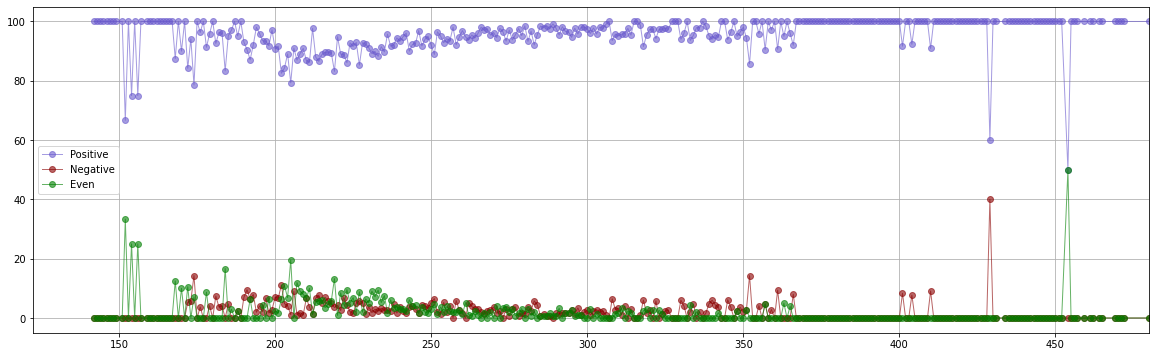

In [450]:
fig, ax1 = plt.subplots(figsize=(20,6))
ax1.plot(agg_pace[agg_pace['pace_strategy']== 'positive'].nettime_minutes, agg_pace[agg_pace['pace_strategy']== 'positive']['position']['count'], color="Slateblue",
        alpha=0.6, linewidth=1, marker='o', label='Positive')
ax1.plot(agg_pace[agg_pace['pace_strategy']== 'negative'].nettime_minutes, agg_pace[agg_pace['pace_strategy']== 'negative']['position']['count'], color="darkred",
        alpha=0.6, linewidth=1, marker='o', label='Negative')
ax1.plot(agg_pace[agg_pace['pace_strategy']== 'even'].nettime_minutes, agg_pace[agg_pace['pace_strategy']== 'even']['position']['count'], color="green",
        alpha=0.6, linewidth=1, marker='o', label='Even')
ax1.grid()
ax1.set_xlim(right=480)
ax1.legend(loc=0)
plt.show()

As expected in the graph above, the majority of the participants (almost 95%) perform positive splits; only about 2.24% manage to run an negative split , and  1.9% completed with an even split (the first and second-half times must vary less than 1%).

We can see that the percentage of negative splits has a range of increase from 180 - 240 minutes (3hrs- 4hrs), but still a large number of positives.  For the joggers (those finishing after the 4-hour mark) most of them run a positive split. 


In [390]:
print('Average finish-time for even split', lochness_data_full[lochness_data_full['pace_strategy'] == 'even']['nettime_minutes'].mean())
print('Average finish-time for positive split', lochness_data_full[lochness_data_full['pace_strategy'] == 'positive']['nettime_minutes'].mean())
print('Average finish-time for negative split', lochness_data_full[lochness_data_full['pace_strategy'] == 'negative']['nettime_minutes'].mean())

Average finish-time for even split 239.595785440613
Average finish-time for positive split 271.4640013363773
Average finish-time for negative split 256.8412098298677


Calculated over all participants, the average finish-times for even, negative, and positive splitters is 238, 256, and 271 minutes, respectively. Interesting to see that an even split pace strategy presented faster finish-times. However, we can't conclude that forcing an even split, will guarante a better finish-time (correlation is not the same as causation).

### Hitting the wall

'Hitting the wall'  is a popular term among the marathoners, and it's  an unmistakably terrible feeling. Hitting the wall happens in a marathon is when your body has run out of fuel and to conserve energy, forces you to run slower. Your legs feel like bricks and it takes every ounce of effort to move them and keep heading towards the finish line. 

Hitting the wall, also called “bonking”, is a common marathon experience that unfortunately, has caused thousands, if not millions, of runners to miss their PRs and even drop out of races.

When runners hit the wall they tend to do so after the 30km mark, but the literature remains somewhat undecided on the extent of the pace changes experienced. For some, pace can slow by 20-25% while others report slow-downs of 50% or even higher.

Running the Loch Ness Marathon is not easy, but we could try to get some insights if someone hit the wall based on their race data. Of course it's not guaranteed, but we could try to make a guess by looking for participants who experienced a significant slow-down in the second-half of their marathon. In this exercise, we focus on finishers who slow down by at least 30% in the second-half split. For tutorial we will consider a runner who runs the first half-split at 5 minutes per km and then slows to 7 min per km in the second-half (a 40% slow-down) to have hit the wall. But if this same runner only slows to 6  min per km ( a 20% slow-down) we will not consider them to have hit the wall, they have slowed because they have fatigued but not hit the wall.



In [399]:
#let's get the lochness full data containing half splits in minutes and pace strategies computed.
lochness_data_full


#let's classify the runners by bonkers or not based on the second-half split variance above 30%.
def get_bonkers(row):
    time = row['second_half'] - row['first_half']
    if time / row['second_half'] >= 0.30:
        return 'bonker'
    return 'non-bonker'

lochness_data_full['hit_the_wall']=lochness_data_full.apply(get_bonkers, axis=1) #infer the bonkers status

In [449]:
#computer the percentage of participants who hit the wall in the second-half of the race.
agg_time_bonker = lochness_data_full.groupby(["nettime_minutes", 'hit_the_wall']).agg({'position': ["count"]}).unstack(fill_value=0).stack()
agg_time_bonker = agg_time_bonker.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

agg_time_bonker = agg_time_bonker[agg_time_bonker.hit_the_wall == 'bonker']
#compute the average proportion of bonkers who hit the wall across all marathons
agg_time_bonker['average'] = agg_time_bonker['position']['count'].mean()


#compute the percentage of males vs females who hit the wall in the second-half of the race.
agg_time_bonker_gender = lochness_data_full.groupby(["nettime_minutes", 'hit_the_wall', 'gender']).agg({'position': ["count"]}).unstack(fill_value=0).stack()
agg_time_bonker_gender = agg_time_bonker_gender.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
agg_time_bonker_gender = agg_time_bonker_gender[agg_time_bonker_gender.hit_the_wall == 'bonker']

#compute the percentage of seniors vs masters who hit the wall in the second-half of the race.
agg_time_bonker_age_category = lochness_data_full.groupby(["nettime_minutes", 'hit_the_wall', 'age_category']).agg({'position': ["count"]}).unstack(fill_value=0).stack()
agg_time_bonker_age_category = agg_time_bonker_age_category.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
agg_time_bonker_age_category = agg_time_bonker_age_category[agg_time_bonker_age_category.hit_the_wall == 'bonker']

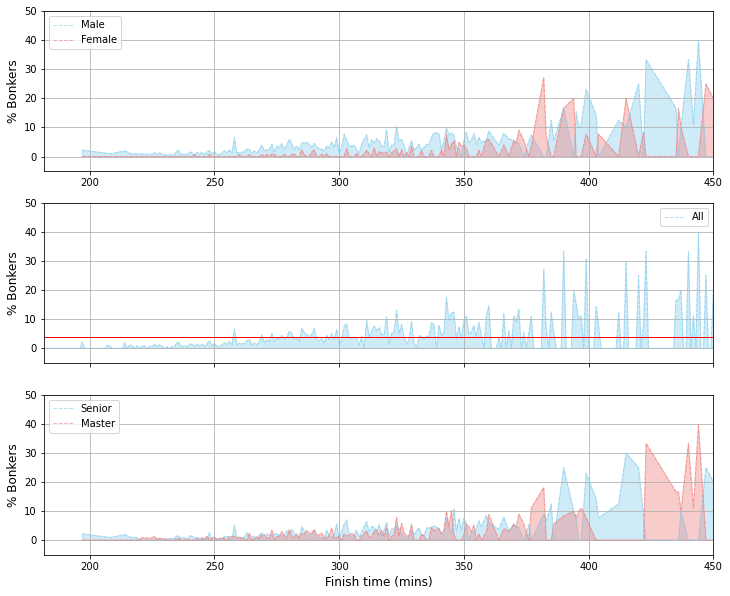

In [453]:
f = plt.figure(figsize=(12,10))
ax1 = f.add_subplot(311)
ax1.fill_between(agg_time_bonker_gender[agg_time_bonker_gender['gender'] == 'M'].nettime_minutes,
   agg_time_bonker_gender[agg_time_bonker_gender['gender'] == 'M']['position']['count'],
                 color="skyblue", alpha=0.4)
ax1.plot(agg_time_bonker_gender[agg_time_bonker_gender['gender'] == 'M'].nettime_minutes,
   agg_time_bonker_gender[agg_time_bonker_gender['gender'] == 'M']['position']['count'], color="skyblue",
         alpha=0.6, linewidth=1, linestyle='dashed', label='Male')

ax1.fill_between(agg_time_bonker_gender[agg_time_bonker_gender['gender'] == 'F'].nettime_minutes,
   agg_time_bonker_gender[agg_time_bonker_gender['gender'] == 'F']['position']['count'],
                 color="lightcoral", alpha=0.4)
ax1.plot(agg_time_bonker_gender[agg_time_bonker_gender['gender'] == 'F'].nettime_minutes,
   agg_time_bonker_gender[agg_time_bonker_gender['gender'] == 'F']['position']['count'], color="lightcoral",
         alpha=0.6, linewidth=1, linestyle='dashed', label='Female')
ax1.set_ylabel('% Bonkers', size=12)
ax1.set_xlim(right=450)
ax1.set_ylim(top=50)
ax1.grid()
ax1.legend(loc=0)

ax2 = f.add_subplot(312, sharex=ax1)
ax2.fill_between(agg_time_bonker.nettime_minutes,
   agg_time_bonker['position']['count'],
                 color="skyblue", alpha=0.4)
ax2.plot(agg_time_bonker.nettime_minutes, agg_time_bonker['position']['count'], color="skyblue",
         alpha=0.6, linewidth=1, linestyle='dashed', label='All')
ax2.plot(agg_time_bonker.nettime_minutes, agg_time_bonker['average'], color='red', linewidth=1)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.set_ylabel('% Bonkers', size=12)
ax2.set_ylim(top=50)
ax2.grid()
ax2.set_xlim(right=450)
ax2.legend(loc=0)


ax3 = f.add_subplot(313, sharex=ax1, sharey=ax1)
ax3.fill_between(agg_time_bonker_age_category[agg_time_bonker_age_category['age_category']== 'Senior'].nettime_minutes,
   agg_time_bonker_age_category[agg_time_bonker_age_category['age_category']== 'Senior']['position']['count'],
                 color="skyblue", alpha=0.4)
ax3.plot(agg_time_bonker_age_category[agg_time_bonker_age_category['age_category']== 'Senior'].nettime_minutes, 
   agg_time_bonker_age_category[agg_time_bonker_age_category['age_category']== 'Senior']['position']['count'], color="skyblue",
         alpha=0.6, linewidth=1, linestyle='dashed', label='Senior')
ax3.fill_between(agg_time_bonker_age_category[agg_time_bonker_age_category['age_category']== 'Master'].nettime_minutes,
   agg_time_bonker_age_category[agg_time_bonker_age_category['age_category']== 'Master']['position']['count'],
                 color="lightcoral", alpha=0.4)
ax3.plot(agg_time_bonker_age_category[agg_time_bonker_age_category['age_category']== 'Master'].nettime_minutes, 
   agg_time_bonker_age_category[agg_time_bonker_age_category['age_category']== 'Master']['position']['count'], color="lightcoral",
         alpha=0.6, linewidth=1, linestyle='dashed', label='Master')
ax3.set_ylabel('% Bonkers', size=12)
ax3.grid()
ax3.set_xlim(right=450)
ax3.set_ylim(top=50)
ax3.legend(loc=0)
ax3.set_xlabel('Finish time (mins)', size=12)

plt.show()

Based on the graphs above, just under 4% of all finishers hit the wall. Good to know that people really respects the pace strategy recommended for the race. For the genders we see only a tendency of hitting the wall for slower runners (joggers and walkers). Beyond the 4-hour mark, we see more finishers hitting the wall and increasing who finishes more than 5 hours.

For gender and age we couldn't get any insights or a tendency for hitting the wall vs finish-time.

### Experience improves performance ?

One of the questions that comes to us is if the finish-times improve with the number of repeates. For example, runners who repeats more than 3-4 times (experienced), their finish times would reduce, since they are more experienced marathoners and more prepared for the course and race? We will try using the data to see any insights to answer this topic.


One of the challenges in this analysis is that we don't have any unique identifier across the marathon result datasets that could confirm the runner repeated more than once the marathon. What we could assume is to use the last name and first name combined and consider as a match (unique runner) if they are identical across the year race results. For instance, let's pick the runner Stuart Turner, it is assumed that he participated of 8 editions of the Loch Ness Marathon based on matches of the columns `firstname` and `lastname ` combined.

In [463]:
#let's create a fullname new column by combining the first name and lastname lowered case.
lochness_data_full['full_name']=  lochness_data_full['firstname'].str.lower()  + lochness_data_full['lastname'].str.lower()

Let's compute the number of repeats based on the ocurrence of the name's runners across the editions and then compute the average finish time based on the number of repeats.

In [478]:
lochness_data_full['repeats'] = lochness_data_full.groupby('full_name')['full_name'].transform(len)
repeats_agg = lochness_data_full.groupby('repeats').agg({'nettime_minutes':'mean'}).reset_index()

In [508]:
#get distribution of repeats of all runners
distribution = lochness_data_full.groupby('full_name').size().to_frame('size').reset_index().groupby('size').size().to_frame('total')

#cumulative sum and percentage column on only repeats
distribution['cum_total'] = distribution['total'].cumsum()
distribution['cum_perc'] = 100*distribution['cum_total']/distribution['total'].sum()
distribution


,total,cum_total,cum_perc
size,,,
1,14641,14641,89.668055
2,1212,15853,97.090887
3,278,16131,98.793484
4,106,16237,99.442675
5,55,16292,99.779520
6,21,16313,99.908133
7,13,16326,99.987751
8,2,16328,100.000000


In [519]:
#Compute the marathon repeats average for those repeaters
print('Average repeats for runners that finish more than one', np.average(distribution[1:].index, weights=distribution[1:]['total']))


Average repeats for runners that finish more than one 2.4836988737403676


In Loch Ness Marathon data we see, based on our assumptions, that 10% of participants complete more than one marathon (during 2003-2022 period) and on average these repeaters complete about 2.48 marathons.


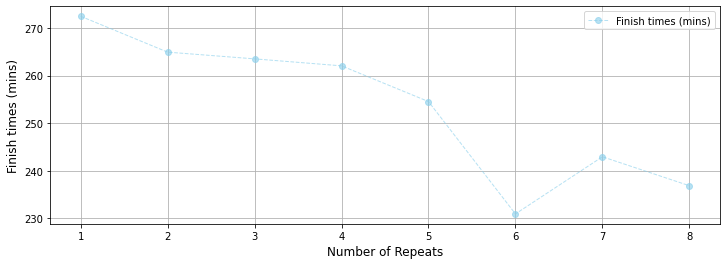

In [482]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(repeats_agg.repeats, repeats_agg['nettime_minutes'], color="skyblue",
         alpha=0.6, linewidth=1, linestyle='dashed', marker='o', label='Finish times (mins)')

ax1.set_xlabel('Number of Repeats', size=12)
ax1.set_ylabel('Finish times (mins)', size=12)
ax1.grid()
ax1.legend(loc=0)
plt.show()

Do these repeat marathoners enjoy any performance benefits? The graph above shows how finish-times tends to improve with the number of repeats. Meanwhile, there is a small increase from 7+ repeats.

Let's take a look at the finish-times more deeply by comparing the distribution of finish-times for those running their first marathon (first-timers) against those who have run 4 or more marathons (experienced), so we can get any insight where the speed-up comes from.

In [532]:

#let's segment the data between first-time marathoners and experienced marathoners (repeats 4 or more)
def get_marathon_class(row):
    if row['repeats'] >= 4:
        return 'experienced'
    elif row['repeats'] == 1:
        return 'first-time'
    return 'mid-experienced'

lochness_data_full['marathon_class']=lochness_data_full.apply(get_marathon_class, axis=1) #infer marathon class

#Aggregate data by finish-time and marathon class and calculate the proportion of finishers for each class
agg_time_marathon_class = lochness_data_full.groupby(["nettime_minutes", 'marathon_class']).agg({'position': ["count"]}).unstack(fill_value=0).stack()
agg_time_marathon_class = agg_time_marathon_class['position']['count'].apply(lambda x:100 * x / agg_time_marathon_class['position']['count'].sum()).reset_index()
agg_time_marathon_class

,nettime_minutes,marathon_class,count
0,142,experienced,0.000000
1,142,first-time,0.000000
2,142,mid-experienced,0.010521
3,143,experienced,0.000000
4,143,first-time,0.005260
...,...,...,...
997,531,first-time,0.005260
998,531,mid-experienced,0.000000
999,533,experienced,0.000000
1000,533,first-time,0.010521


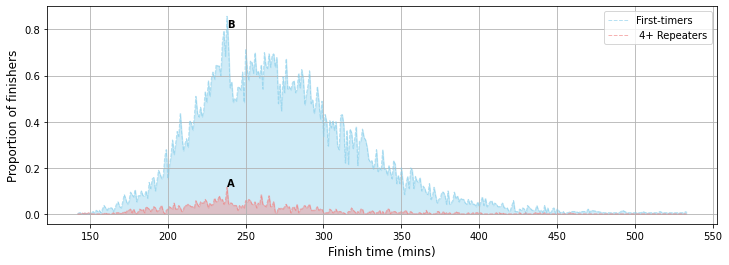

In [538]:
agg_time_marathon_class_first_time = agg_time_marathon_class[agg_time_marathon_class['marathon_class'] == 'first-time']
agg_time_marathon_class_experienced = agg_time_marathon_class[agg_time_marathon_class['marathon_class'] == 'experienced']


fig, ax1 = plt.subplots(figsize=(12,4))
ax1.fill_between(agg_time_marathon_class_first_time.nettime_minutes,
   agg_time_marathon_class_first_time['count'],
                 color="skyblue", alpha=0.4)
ax1.fill_between(agg_time_marathon_class_experienced.nettime_minutes,
   agg_time_marathon_class_experienced['count'],
                 color="lightcoral", alpha=0.4)
ax1.plot(agg_time_marathon_class_first_time.nettime_minutes, agg_time_marathon_class_first_time['count'], color="skyblue",
         alpha=0.6, linewidth=1, linestyle='dashed', label='First-timers')
ax1.plot(agg_time_marathon_class_experienced.nettime_minutes, agg_time_marathon_class_experienced['count'], color="lightcoral",
         alpha=0.6, linewidth=1, linestyle='dashed', label=' 4+ Repeaters')

plt.text(238,0.12,'A', fontweight='bold')
plt.text(238,0.81,'B', fontweight='bold')
ax1.set_xlabel('Finish time (mins)', size=12)
ax1.set_ylabel('Proportion of finishers', size=12)
ax1.grid()
ax1.legend(loc=0)
plt.show()

By looking the chart above we can see that the most common finish-time for experienced runners (label A) is 238 minutes, as same as for the first-timers , 238 minutes pointed by B. We don't see any differences with faster and slower runners, so it means that running more editions of Loch Ness does not have a direct impact on speed performance.



## Conclusions

Loch Ness Marathon is a growing race event in UK and it continues to attract many people from men and women, young and old, fast and slow, first-timers and experienced. More than 40,000 race results were analyzed with some interesting observations:


- The percentage of females continues to grow up relative to males (almost 40% in 2022) and it attracts many older runners (master over 40+).

-  Definetely it is not a easy race, due to its downhills, where year by year, the finish-times have been gradually increasing, for men and women, young and old.

- The pace strategy is quite recommended for this marathon, with almost 95%+ of participants performing positive splits, you must save energy for the second half split with some hill sections to endure.

- Hitting the wall isn't common; so it means many people respects the training process for the marathon.

- Repeating the marathon can help the runners enjoy faster times on average. But it isn't a marathon based on the number that many people prefer to repeat (less than 10% on average).


- Finally, it is a marathon that anyone should participate, the energy and views are incredible! And it is a moderate marathon to put your legs in test with his downhills sections.
